<a href="https://colab.research.google.com/github/yrevanth/MLProject_Text/blob/master/EDA_Google_App_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/UTA_ML/Play_Store_2.csv')

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,War Dragons,Others,3.9,160604.0,270.0,10000000.0,Free,0.0,Everyone,Yes,Yes,Yes
1,CV-Library Job Search,BUSINESS,4.4,NaN,46.0,100000.0,Free,0.0,Everyone,No,No,No
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.0,29.0,100000.0,Free,0.0,Everyone,Yes,No,No
3,Ay,Others,NaN,11.0,36.0,5000.0,Free,0.0,Teen,Yes,No,No
4,EA Plus,Others,2.5,12.0,12.0,1000.0,Free,0.0,Everyone,No,No,No


In [5]:
data.shape

(4153, 12)

In [7]:
data['App'].nunique()

4153

In [8]:
data['Category'].unique()

array(['Others', 'BUSINESS', 'BOOKS_AND_REFERENCE', 'TOOLS', 'GAME',
       'PERSONALIZATION', 'FAMILY', 'PRODUCTIVITY', 'FINANCE',
       'HEALTH_AND_FITNESS', 'LIFESTYLE', 'COMMUNICATION', 'MEDICAL',
       'SPORTS', 'PHOTOGRAPHY'], dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4153 entries, 0 to 4152
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               4153 non-null   object 
 1   Category          4153 non-null   object 
 2   Rating            3976 non-null   float64
 3   Reviews           4029 non-null   float64
 4   Size              4153 non-null   float64
 5   Installs          4153 non-null   float64
 6   Paid/Free         4153 non-null   object 
 7   Price             4153 non-null   float64
 8   Content Rating    4153 non-null   object 
 9   Ad Supported      4153 non-null   object 
 10  In App Purchases  4153 non-null   object 
 11  Editors Choice    4153 non-null   object 
dtypes: float64(5), object(7)
memory usage: 389.5+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,3976.0,4.189487e+00,5.197921e-01,1.000,4.0,4.3,4.5,5.00
Reviews,4029.0,6.696421e+04,1.074189e+05,1.000,224.0,7461.0,78219.0,312204.00
Size,4153.0,8.225441e+01,9.225633e+01,0.011,22.0,42.0,84.0,270.00
Installs,4153.0,3.232706e+06,5.421343e+06,1.000,10000.0,500000.0,5000000.0,19970000.00
Price,4153.0,5.653407e-01,8.926313e+00,0.000,0.0,0.0,0.0,399.99


In [11]:
data['Price'].nunique()

48

In [18]:
data[data['Rating'].isnull()==True]

,App,Category,Rating,Reviews,Size,Installs,Paid/Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
2,Surah Al-Waqiah,BOOKS_AND_REFERENCE,NaN,1201.0,29.0,100000.0,Free,0.0,Everyone,Yes,No,No
3,Ay,Others,NaN,11.0,36.0,5000.0,Free,0.0,Teen,Yes,No,No
58,Sounds for Toddlers FREE,FAMILY,NaN,6190.0,23.0,1000000.0,Free,0.0,Everyone,Yes,No,No
107,OWLIE BOO,FAMILY,NaN,834.0,22.0,100000.0,Free,0.0,Everyone,Yes,No,No
152,Block Strike,GAME,NaN,312204.0,60.0,10000000.0,Free,0.0,Teen,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
4046,Rope Hero 3,GAME,NaN,45871.0,99.0,5000000.0,Free,0.0,Teen,Yes,Yes,No
4064,Learn 50 languages,Others,NaN,55256.0,14.0,5000000.0,Free,0.0,Everyone,Yes,Yes,No
4083,Zenith Bank Mobile App,FINANCE,NaN,7215.0,18.0,1000000.0,Free,0.0,Everyone,No,No,No
4117,Job CV Maker & Portfolio Maker,FAMILY,NaN,593.0,49.0,100000.0,Free,0.0,Everyone,Yes,No,No


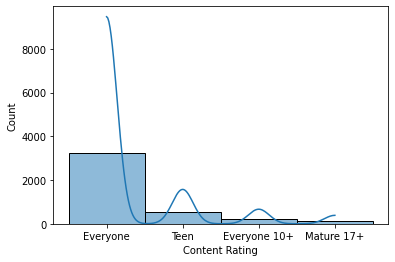

In [27]:
sns.histplot(data=data,x=',kde=True)

In [31]:
data[data['Rating'].isnull()==True]['Content Rating'].value_counts()

Everyone        136
Teen             26
Everyone 10+     12
Mature 17+        3
Name: Content Rating, dtype: int64

In [30]:
data.groupby(['Category','Content Rating']).mean()

Rating        Reviews        Size  \
Category            Content Rating                                        
BOOKS_AND_REFERENCE Everyone        4.390141   22147.333333   48.768253   
                    Everyone 10+    4.450000  189695.000000   46.500000   
                    Mature 17+      3.900000    1778.000000   49.000000   
                    Teen            4.185714  142701.666667  198.714286   
BUSINESS            Everyone        4.179091   23998.900901   58.853461   
                    Teen            3.850000      10.500000   20.000000   
COMMUNICATION       Everyone        3.989535   56815.545455   46.502146   
                    Mature 17+      4.300000  104564.333333  111.666667   
                    Teen            4.133333   48052.000000   32.107667   
FAMILY              Everyone        4.200000   32730.168761   44.031906   
                    Everyone 10+    4.200000   75490.777778   52.326087   
                    Mature 17+      4.200000   38846.000000   48.315789   
                    Teen            4.157303   79269.988889   51.904255   
FINANCE             Everyone        4.115385   28192.595890   58.803733   
                    Teen            3.800000  106276.000000  165.500000   
GAME                Everyone        4.281356  126466.190678   45.419620   
                    Everyone 10+    4.337736  146171.345455   57.727273   
                    Mature 17+      4.229167  159116.333333   62.600000   
                    Teen            4.293701  131420.736434   51.812030   
HEALTH_AND_FITNESS  Everyone        4.258678   58921.649573   96.935355   
                    Everyone 10+    4.300000    2527.250000   31.250000   
                    Mature 17+      4.300000   11335.666667   68.333333   
                    Teen            4.425000   94096.500000  136.375000   
LIFESTYLE           Everyone        4.101653   24082.446281   60.911317   
                    Everyone 10+    1.800000       5.000000   18.000000   
                    Mature 17+      4.300000     529.000000  118.666667   
                    Teen            4.470000   37172.090909   90.181818   
MEDICAL             Everyone        4.138971    4124.948905   36.650815   
                    Everyone 10+    4.350000      95.000000   20.000000   
                    Teen            4.466667    7133.666667  102.974667   
Others              Everyone        4.204821   75339.422330  126.379184   
                    Everyone 10+    4.274038  122661.227273  228.455357   
                    Mature 17+      4.016667   81797.115942  116.041667   
                    Teen            4.286250  131285.060484  200.351174   
PERSONALIZATION     Everyone        4.295050   38049.306931   31.981029   
                    Everyone 10+    4.500000    6109.500000   18.500000   
                    Mature 17+      4.500000    5430.500000   49.333333   
                    Teen            4.200000   56121.875000   38.250000   
PHOTOGRAPHY         Everyone        4.074074   84999.120370   50.404679   
                    Mature 17+      4.300000  282077.500000   31.500000   
                    Teen            4.040000   65004.200000  122.200000   
PRODUCTIVITY        Everyone        4.134483   43689.634146   60.064270   
                    Everyone 10+    3.600000      49.000000   23.000000   
                    Mature 17+      4.600000      84.000000   23.000000   
SPORTS              Everyone        4.232479   86973.940171   91.162393   
                    Everyone 10+    4.200000  148942.333333  155.250000   
                    Teen            4.187500   87631.428571   90.111111   
TOOLS               Everyone        3.994077   33040.349315   31.962621   
                    Mature 17+      3.700000      43.000000   10.000000   
                    Teen            4.200000  156121.500000   15.687500   

                                        Installs     Price  
Category            Content Rating                          
BOOKS_AND_REFER

In [33]:
data.Rating.value_counts(normalize=True,dropna=False)

4.4    0.109078
4.3    0.109078
4.5    0.106188
4.2    0.098724
4.6    0.084999
4.1    0.074645
4.0    0.058753
4.7    0.054178
NaN    0.042620
3.9    0.039490
3.8    0.028895
4.8    0.027691
5.0    0.021190
3.7    0.020949
3.6    0.017818
3.5    0.017337
3.4    0.011799
4.9    0.011799
3.1    0.008668
3.3    0.008428
3.0    0.008187
3.2    0.007224
2.9    0.006020
2.8    0.004816
2.6    0.002649
2.5    0.002408
2.3    0.002408
2.7    0.001926
2.4    0.001926
2.2    0.001686
2.0    0.001686
1.9    0.001445
1.8    0.001204
1.0    0.001204
2.1    0.001204
1.6    0.000482
1.7    0.000482
1.4    0.000482
1.2    0.000241
Name: Rating, dtype: float64